## This code suppresses warning messages, and imports necessary libraries for data handling, analysis, and visualization. Specifically, it imports pandas for data manipulation, numpy for numerical operations, seaborn and matplotlib.pyplot for data visualization, and colorama for coloring terminal text.


In [1]:
import warnings
warnings.filterwarnings('ignore') 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from colorama import Fore

## This code reads three CSV files into pandas DataFrames. The first file 'ML_case_Study.csv' is loaded into a DataFrame named 'case_study', containing data relevant to a machine learning case study. The second file 'cities.csv' is loaded into a DataFrame named 'cities', which likely contains information about various cities. The third file 'Colleges.csv' is loaded into a DataFrame named 'colleges', presumably containing data about different colleges.


In [2]:
case_study=pd.read_csv("/Users/maneeshradhakrishnan/Downloads/ML_case_Study.csv")
cities=pd.read_csv("/Users/maneeshradhakrishnan/Downloads/cities.csv")
colleges=pd.read_csv("/Users/maneeshradhakrishnan/Downloads/Colleges.csv")

## get the first 5 rows of case_study

In [3]:
case_study.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,SVNIT Surat,Asansol,Manager,55523.0,3,66,19,71406.58
1,NIT Bhopal,Ajmer,Executive,57081.0,1,84,18,68005.87
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010.0,2,81,33,82092.39
4,DTU,Durgapur,Executive,57879.0,4,74,32,73878.10


## get the first 5 rows of colleges


In [4]:
colleges.head()

,Tier 1,Tier 2,Tier 3
0,IIT Bombay,IIIT Bangalore,"Ramaiah Institute of Technology, Bengaluru"
1,IIT Delhi,IIIT Delhi,TIET/Thapar University
2,IIT Kharagpur,IGDTUW,Manipal Main Campus
3,IIT Madras,NIT Calicut,VIT Vellore
4,IIT Kanpur,IIITM Gwalior,SRM Main Campus


## shape of case_study

In [5]:
case_study.shape

(1589, 8)

## get the first 5 rows of cities


In [6]:
cities.head

<bound method NDFrame.head of   Metrio City non-metro cities
0      Mumbai         Dehradun
1       Delhi         Durgapur
2     Kolkata          Asansol
3     Chennai         Rourkela
4   Bangalore        Kozhikode
5   Hyderabad  Rajpur Sonarpur
6   Ahmedabad         Kolhapur
7        Pune            Ajmer
8       Surat              NaN>

## shape of colleges table

In [7]:
colleges.shape

(28, 3)

## Checking for null values in the 'case_study' DataFrame.


In [8]:
case_study.isnull().sum()

College                0
City                   0
Role                   0
Previous CTC           0
Previous job change    0
Graduation Marks       0
EXP (Month)            0
CTC                    0
dtype: int64

# Selecting non-numeric columns from 'case_study' and counting unique values in each, sorted in ascending order.


In [9]:
Case_study_cat=case_study.select_dtypes(exclude=np.number).nunique().sort_values(ascending=True)

In [10]:
Case_study_cat

Role        2
City       15
College    66
dtype: int64

# Creating a pairplot for the 'case_study' DataFrame to visualize relationships between its numerical variables.


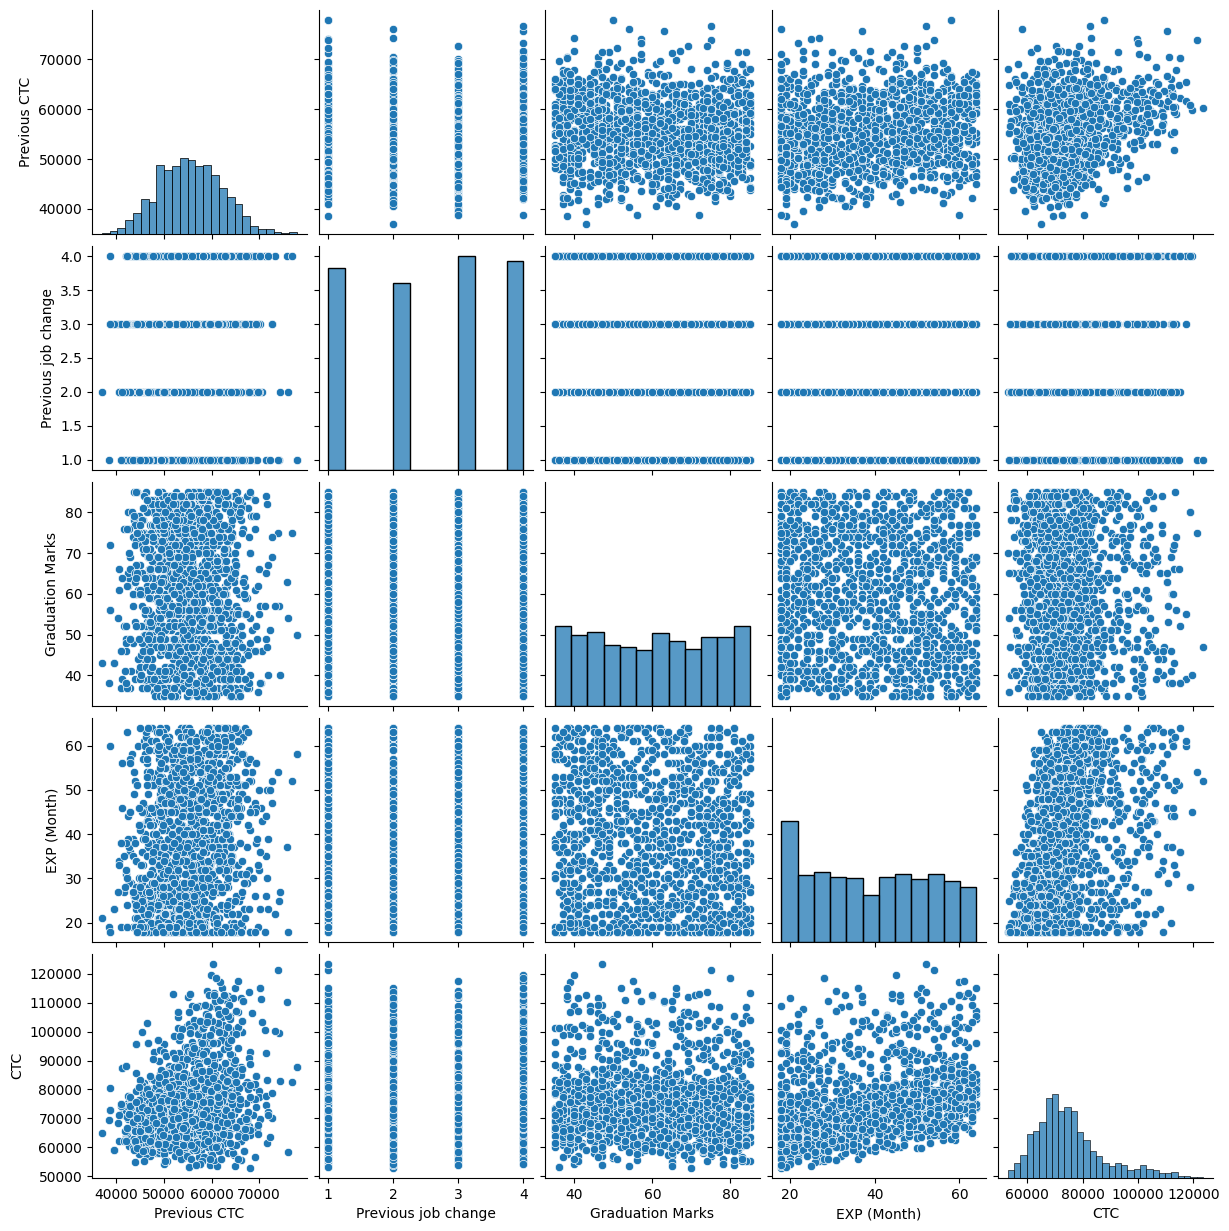

In [11]:
sns.pairplot(case_study)

# Creating a pairplot for the 'case_study' DataFrame to visualize relationships between its numerical variables.


In [12]:
case_study_num=case_study.select_dtypes(include=np.number)

# Iterating through the columns of 'case_study_num' to create and display a boxplot for each numeric column, highlighting outliers and distribution.


For column :  Previous CTC


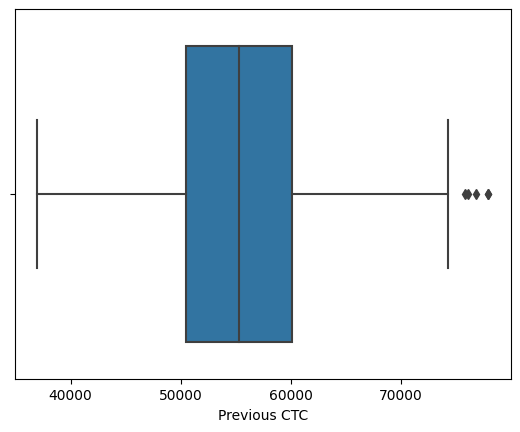

For column :  Previous job change


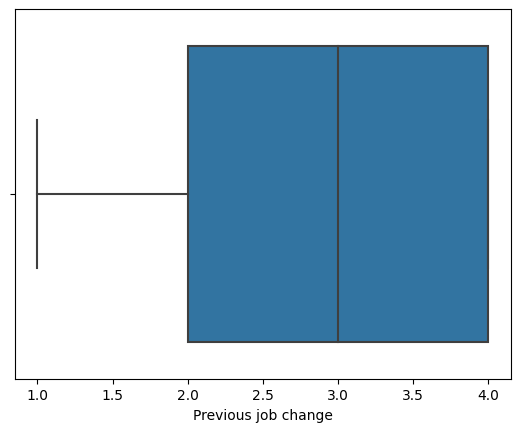

For column :  Graduation Marks


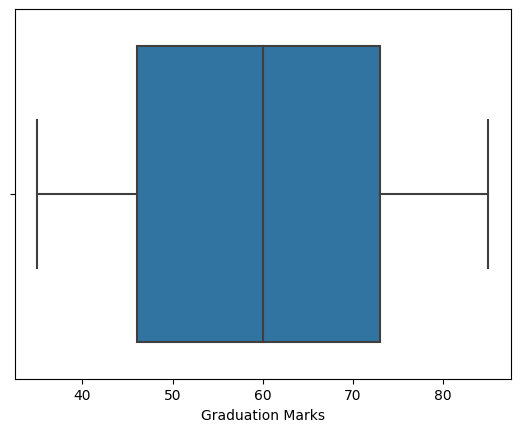

For column :  EXP (Month)


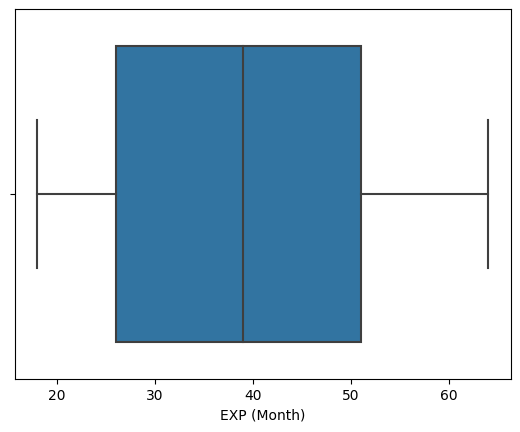

For column :  CTC


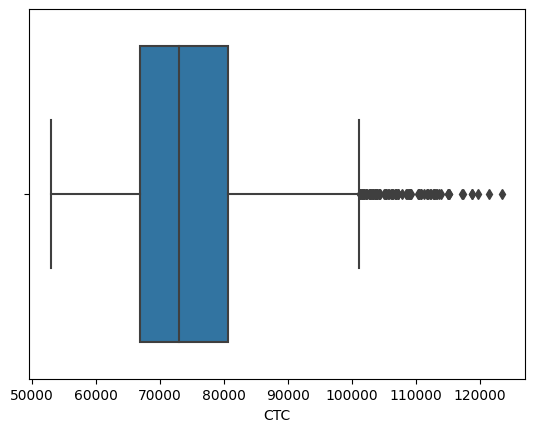

In [13]:
for i in case_study_num.columns:
    print("For column : ",i)
    sns.boxplot(case_study[i])
    plt.show()

# treating  the outliers with iqr methed as we found outliers in CTC and Previous CTC

In [14]:
def treat_outlier(col):
     print('treat_outlier dtype -->', col.dtype)
     q1,q3 = col.quantile([0.25,0.75])
     print("First Quartlie- ", q1)
     print("Third Quartlie- ", q3)
     IQR = q3-q1
     print('IQR -->', IQR)
     lower_range = q1-(1.5*IQR)
     print('lower_range -->', lower_range)
     upper_range = q3 + (1.5*IQR)
     print('upper_range -->', upper_range)
     return lower_range, upper_range

In [15]:
lri,uri=treat_outlier(case_study['CTC'])
case_study['CTC']=np.where(case_study['CTC']>uri,uri,case_study['CTC'])
case_study['CTC']=np.where(case_study['CTC']<lri,lri,case_study['CTC'])
print('replaced dataframe  for CTC -->', case_study['CTC'])
lri,uri=treat_outlier(case_study['Previous CTC'])
case_study['Previous CTC']=np.where(case_study['Previous CTC']>uri,uri,case_study['Previous CTC'])
case_study['Previous CTC']=np.where(case_study['Previous CTC']<lri,lri,case_study['Previous CTC'])
print('replaced dataframe for Previous CTC -->', case_study['Previous CTC'])

treat_outlier dtype --> float64
First Quartlie-  66902.35
Third Quartlie-  80588.67
IQR --> 13686.319999999992
lower_range --> 46372.87000000002
upper_range --> 101118.15
replaced dataframe  for CTC --> 0       71406.58
1       68005.87
2       76764.02
3       82092.39
4       73878.10
          ...   
1584    77283.59
1585    68416.86
1586    70186.19
1587    73394.09
1588    70056.31
Name: CTC, Length: 1589, dtype: float64
treat_outlier dtype --> float64
First Quartlie-  50518.0
Third Quartlie-  60109.0
IQR --> 9591.0
lower_range --> 36131.5
upper_range --> 74495.5
replaced dataframe for Previous CTC --> 0       55523.0
1       57081.0
2       60347.0
3       49010.0
4       57879.0
         ...   
1584    61285.0
1585    63140.0
1586    44907.0
1587    52054.0
1588    44353.0
Name: Previous CTC, Length: 1589, dtype: float64


# Checking outliers now

For column :  Previous CTC


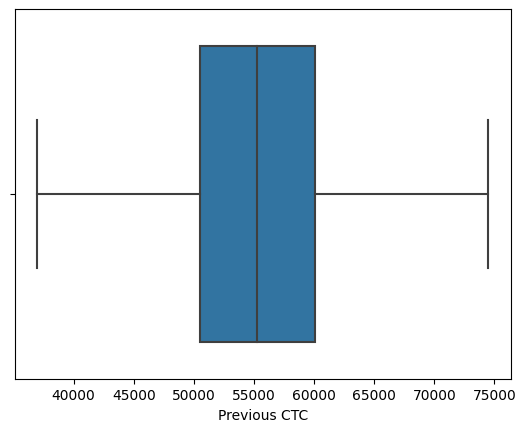

For column :  Previous job change


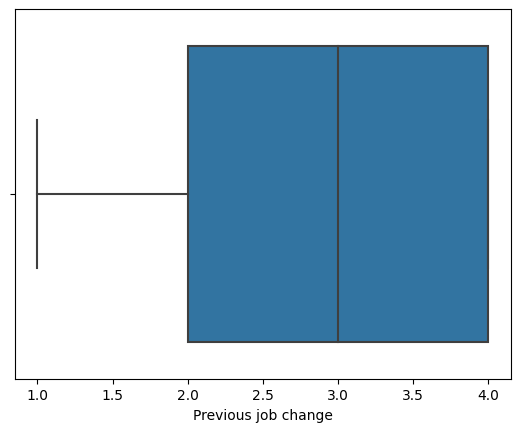

For column :  Graduation Marks


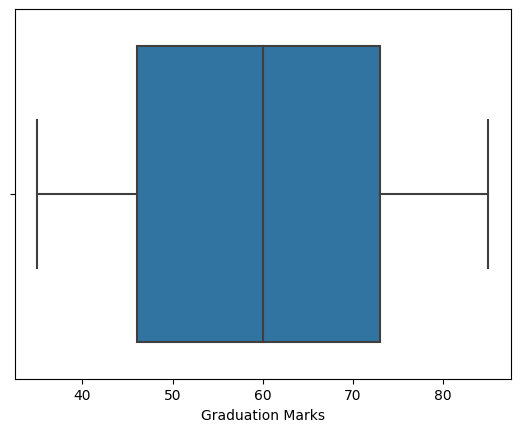

For column :  EXP (Month)


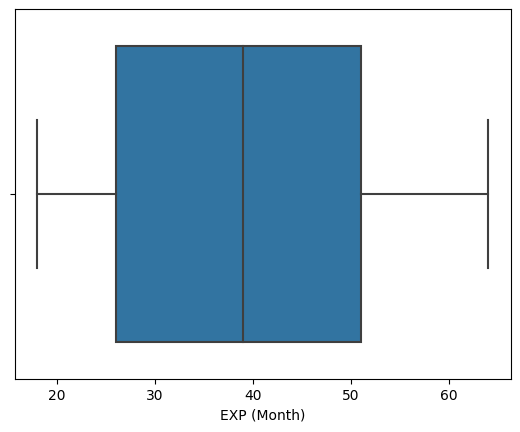

For column :  CTC


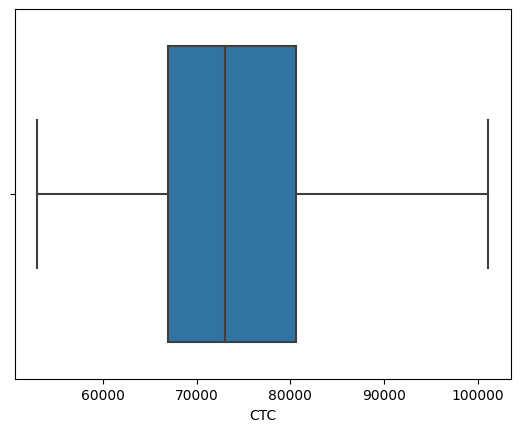

In [16]:
for i in case_study_num.columns:
    print("For column : ",i)
    sns.boxplot(case_study[i])
    plt.show()

# converting the tiers from colleges table to list

In [17]:
tier_1=colleges['Tier 1'] .tolist()
tier_2=colleges['Tier 2'] .tolist()
tier_3=colleges['Tier 3'] .tolist()



# running for loop to convert the tiers to 1,2,3

In [18]:
for item in case_study.College:
    if item in tier_1:
        case_study['College'].replace(item,1,inplace=True)
    elif item in tier_2:
        case_study['College'].replace(item,2,inplace=True)
    elif item in tier_3:
        case_study['College'].replace(item,3,inplace=True)

In [19]:
case_study.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,2,Asansol,Manager,55523.0,3,66,19,71406.58
1,2,Ajmer,Executive,57081.0,1,84,18,68005.87
2,3,Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02
3,3,Ajmer,Executive,49010.0,2,81,33,82092.39
4,1,Durgapur,Executive,57879.0,4,74,32,73878.10


# converting the metro and non metros from cities table to list

In [20]:
nonmetro=cities['non-metro cities'] .tolist()
metro=cities['Metrio City'] .tolist()

# running for loop to convert the metro to 1,0


In [21]:
for item in case_study.City:
    if item in metro:
        case_study['City'].replace(item,1,inplace=True)
    elif item in nonmetro:
        case_study['City'].replace(item,0,inplace=True)

In [22]:
case_study.head(10)

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,2,0,Manager,55523.0,3,66,19,71406.58
1,2,0,Executive,57081.0,1,84,18,68005.87
2,3,0,Executive,60347.0,2,52,28,76764.02
3,3,0,Executive,49010.0,2,81,33,82092.39
4,1,0,Executive,57879.0,4,74,32,73878.10
5,2,0,Executive,54340.0,4,73,31,59950.89
6,3,1,Executive,60298.0,1,42,46,66602.34
7,2,1,Executive,49944.0,2,56,37,57768.44
8,3,1,Executive,53124.0,4,40,37,70083.30
9,1,0,Executive,51141.0,1,47,60,85648.48


# convert the role column from case_study  to dummies

In [23]:
case_study['Role']=pd.get_dummies(case_study["Role"],drop_first='True')


# ploting count plot for role columns

Role count manager and Executive
0    0.793581
1    0.206419
Name: Role, dtype: float64


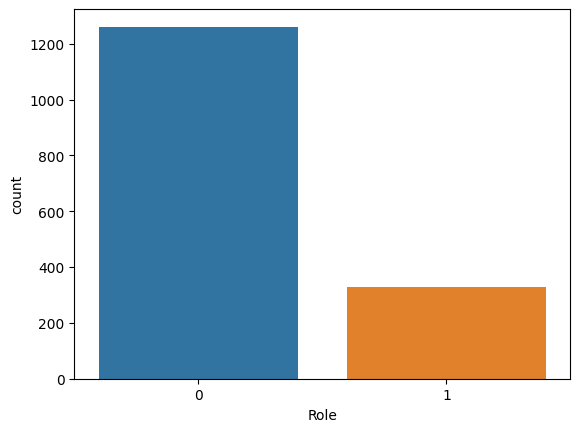

In [24]:
sns.countplot(case_study['Role'])
print('Role count manager and Executive')
print(case_study['Role'].value_counts(normalize=True))
plt.show()

# ploting count plot for College columns

Count tier vise colleges
1    0.363751
3    0.339207
2    0.297042
Name: College, dtype: float64


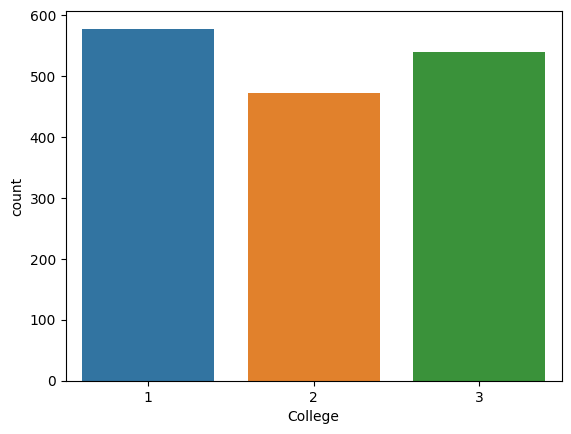

In [25]:
sns.countplot(case_study['College'])
print('Count tier vise colleges')
print(case_study['College'].value_counts(normalize=True))
plt.show()

# ploting count plot for City columns

Count METRO and NON-METRO CITIES
1    0.51416
0    0.48584
Name: City, dtype: float64


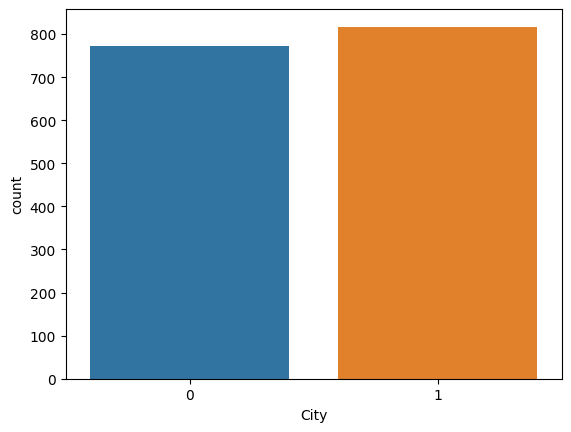

In [26]:
sns.countplot(case_study['City'])
print('Count METRO and NON-METRO CITIES')
print(case_study['City'].value_counts(normalize=True))
plt.show()

# using standerd scaler to  standardizes the Previous_CTC_std

In [27]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
case_study['Previous_CTC_std'] = std_scaler.fit_transform(case_study[['Previous CTC']])
case_study.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Previous_CTC_std
0,2,0,1,55523.0,3,66,19,71406.58,0.001826
1,2,0,0,57081.0,1,84,18,68005.87,0.236820
2,3,0,0,60347.0,2,52,28,76764.02,0.729432
3,3,0,0,49010.0,2,81,33,82092.39,-0.980533
4,1,0,0,57879.0,4,74,32,73878.10,0.357183


# scale the features to a given range in MinMaxScaler

In [28]:
from sklearn.preprocessing import MinMaxScaler
norm_scale = MinMaxScaler()
case_study['PCTC_minmax_scale'] = norm_scale.fit_transform(case_study[['Previous CTC']])
case_study.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Previous_CTC_std,PCTC_minmax_scale
0,2,0,1,55523.0,3,66,19,71406.58,0.001826,0.494141
1,2,0,0,57081.0,1,84,18,68005.87,0.236820,0.535681
2,3,0,0,60347.0,2,52,28,76764.02,0.729432,0.622762
3,3,0,0,49010.0,2,81,33,82092.39,-0.980533,0.320486
4,1,0,0,57879.0,4,74,32,73878.10,0.357183,0.556958


# Using linear regression

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

lr=LinearRegression()

In [30]:
X=case_study.drop("CTC",axis=1)
y=case_study["CTC"]

In [31]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1112, 9)
(477, 9)
(1112,)
(477,)


In [32]:
lr_model=lr.fit(X_train,y_train)

In [33]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_squared_log_error


In [34]:
predict_train=lr_model.predict(X_train)
print(Fore.GREEN,"For Linear  Regression for Train data ")

print("R2 score Train data",r2_score(y_train, predict_train))
print("MAE Score Train data",mean_absolute_error(y_train,predict_train))
print("MSE Score Train data",mean_squared_error(y_train,predict_train))

 For Linear  Regression for Train data 
R2 score Train data 0.527931044938998
MAE Score Train data 6558.972217682019
MSE Score Train data 65466759.76245156


In [35]:
predict_test=lr_model.predict(X_test)
print(Fore.BLUE,"For Linear  Regression for test data ")

print("R2 score test data",r2_score(y_test, predict_test))
print("MAE Score test data",mean_absolute_error(y_test,predict_test))
print("MSE Score test data",mean_squared_error(y_test,predict_test))

 For Linear  Regression for test data 
R2 score test data 0.5023845386022145
MAE Score test data 6087.750698132588
MSE Score test data 59559479.79565692


# both train and test data shown the R2  of 50% in test and 52% in train data

## KDE plot to find the relaton between train test prediction vs actual data

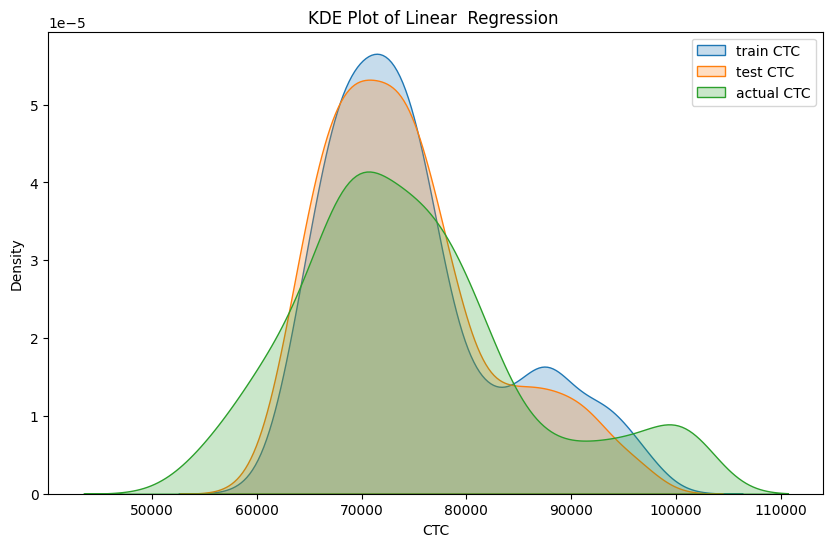

In [36]:
plt.figure(figsize=(10, 6))
sns.kdeplot(predict_train, label='train CTC', shade=True)
sns.kdeplot(predict_test, label='test CTC', shade=True)
sns.kdeplot(y_test, label='actual CTC', shade=True)
plt.title('KDE Plot of Linear  Regression ')
plt.xlabel('CTC')
plt.ylabel('Density')
plt.legend()
plt.show()

# Using  RandomForestRegressor

In [37]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
rf_model=RandomForestRegressor()

In [38]:
rf_model.fit(X_train, y_train)


RandomForestRegressor()

In [39]:
predict_train_rf = rf_model.predict(X_train)
print(Fore.GREEN,"For Random forrest for train data ")

print("R2 score test data",r2_score(y_train, predict_train_rf))
print("MAE Score test data",mean_absolute_error(y_train,predict_train_rf))
print("MSE Score test data",mean_squared_error(y_train,predict_train_rf))

 For Random forrest for train data 
R2 score test data 0.944156356906888
MAE Score test data 2129.097792356105
MSE Score test data 7744424.469015168


In [40]:
predict_test_rf = rf_model.predict(X_test)
print(Fore.BLUE,"For Random forrest for test data ")
print("R2 score test data",r2_score(y_test, predict_test_rf))

print("MAE Score test data",mean_absolute_error(y_test,predict_test_rf))
print("MSE Score test data",mean_squared_error(y_test,predict_test_rf))

 For Random forrest for test data 
R2 score test data 0.586114264197213
MAE Score test data 5462.716166037731
MSE Score test data 49537888.25213217


# both train and test data shown the R2  of 59% in test and 94% in train data


## KDE plot to find the relaton between train test prediction vs actual data


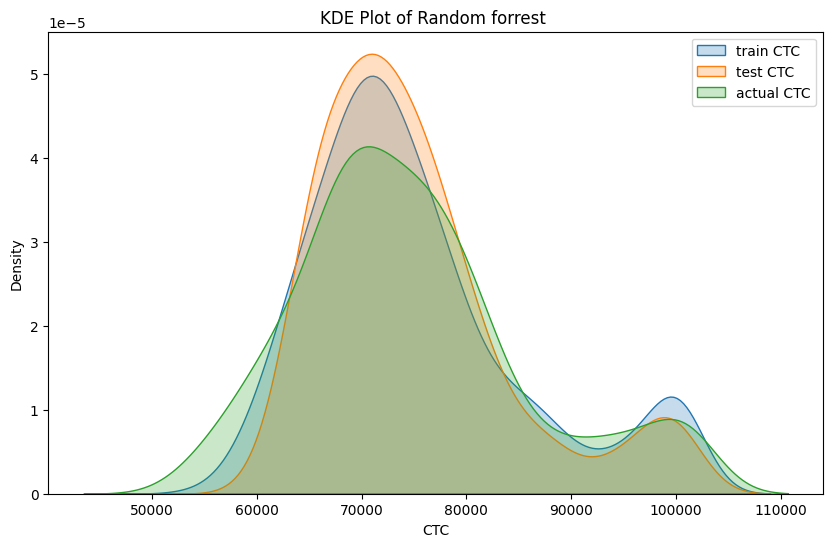

In [41]:
plt.figure(figsize=(10, 6))
sns.kdeplot(predict_train_rf, label='train CTC', shade=True)
sns.kdeplot(predict_test_rf, label='test CTC', shade=True)
sns.kdeplot(y_test, label='actual CTC', shade=True)
plt.title('KDE Plot of Random forrest ')
plt.xlabel('CTC')
plt.ylabel('Density')
plt.legend()
plt.show()

# Using  GridSearchCV

In [42]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': np.arange(100, 500, 100),
    'max_depth': np.arange(5, 15, 2)
}

In [43]:
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(Fore.GREEN,"Best parameters:", best_params)

best_model = grid_search.best_estimator_
y_pred_gs_train = best_model.predict(X_train)
print(Fore.GREEN,"For Gridsearch for train data ")

print("R2 score test data",r2_score(y_train, y_pred_gs_train))

print("MAE Score test data",mean_absolute_error(y_train,y_pred_gs_train))
print("MSE Score test data",mean_squared_error(y_train,y_pred_gs_train))

 Best parameters: {'max_depth': 5, 'n_estimators': 200}
 For Gridsearch for train data 
R2 score test data 0.6771797428608288
MAE Score test data 5273.9600617129745
MSE Score test data 44768875.38146194


In [44]:
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(Fore.BLUE,"Best parameters:", best_params)

best_model = grid_search.best_estimator_
y_pred_gs_test = best_model.predict(X_test)
print(Fore.BLUE,"For Gridsearch for test data ")

print("R2 score test data",r2_score(y_test, y_pred_gs_test))

print("MAE Score test data",mean_absolute_error(y_test,y_pred_gs_test))
print("MSE Score test data",mean_squared_error(y_test,y_pred_gs_test))

 Best parameters: {'max_depth': 11, 'n_estimators': 300}
 For Gridsearch for test data 
R2 score test data 0.5927824298330266
MAE Score test data 5438.525973965017
MSE Score test data 48739777.045248166


# both train and test data shown the R2  of 57% in test and 67% in train data


## KDE plot to find the relaton between train test prediction vs actual data


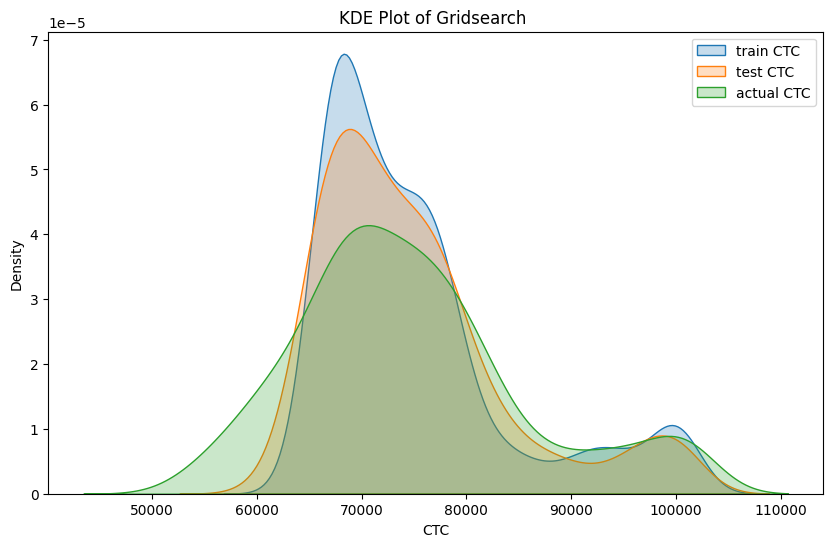

In [45]:
plt.figure(figsize=(10, 6))
sns.kdeplot(y_pred_gs_train, label='train CTC', shade=True)
sns.kdeplot(y_pred_gs_test, label='test CTC', shade=True)
sns.kdeplot(y_test, label='actual CTC', shade=True)
plt.title('KDE Plot of Gridsearch ')
plt.xlabel('CTC')
plt.ylabel('Density')
plt.legend()
plt.show()

# Using  Ridge and Lasso Regression

In [46]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
lasso = Lasso(alpha=1.0)
ridge = Ridge(alpha=1.0)
lasso.fit(X_train, y_train)
ridge.fit(X_train, y_train)


Ridge()

In [47]:
predict_train_l = lasso.predict(X_train)
print(Fore.GREEN,"For Lasso regression for train data ")

print("R2 score test data",r2_score(y_train, predict_train_l))
print("MAE Score test data",mean_absolute_error(y_train,predict_train_l))
print("MSE Score test data",mean_squared_error(y_train,predict_train_l))

 For Lasso regression for train data 
R2 score test data 0.5279309569395154
MAE Score test data 6559.154808810544
MSE Score test data 65466771.966263995


In [48]:
predict_test_l = lasso.predict(X_test)
print(Fore.BLUE,"For Lasso regression for test data ")
print("R2 score test data",r2_score(y_test, predict_test_l))

print("MAE Score test data",mean_absolute_error(y_test,predict_test_l))
print("MSE Score test data",mean_squared_error(y_test,predict_test_l))

 For Lasso regression for test data 
R2 score test data 0.502404028789474
MAE Score test data 6087.731793878923
MSE Score test data 59557147.01963941


# both train and test data shown the R2  of 50% in test and 52% in train data


## KDE plot to find the relaton between train test prediction vs actual data


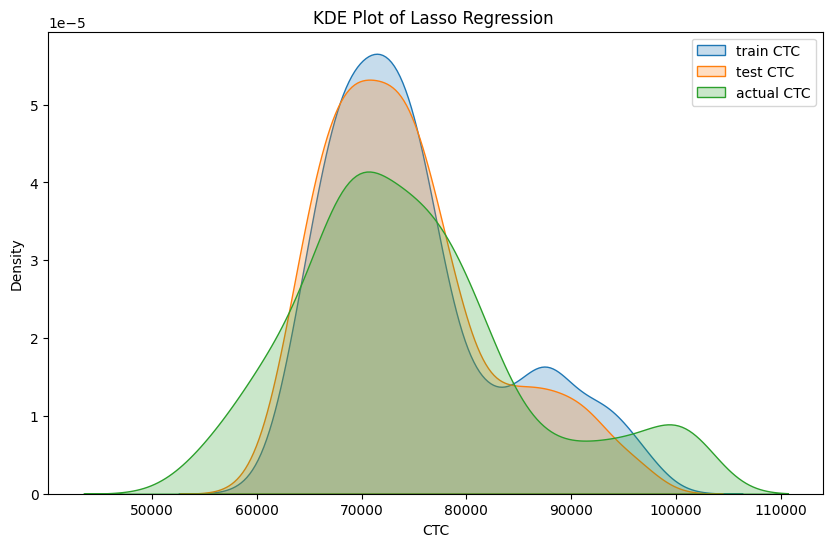

In [49]:
plt.figure(figsize=(10, 6))
sns.kdeplot(predict_train_l, label='train CTC', shade=True)
sns.kdeplot(predict_test_l, label='test CTC', shade=True)
sns.kdeplot(y_test, label='actual CTC', shade=True)
plt.title('KDE Plot of Lasso Regression ')
plt.xlabel('CTC')
plt.ylabel('Density')
plt.legend()
plt.show()

In [50]:
predict_train_r = ridge.predict(X_train)
print(Fore.GREEN,"For Ridge regression for train data ")

print("R2 score test data",r2_score(y_train, predict_train_r))
print("MAE Score test data",mean_absolute_error(y_train,predict_train_r))
print("MSE Score test data",mean_squared_error(y_train,predict_train_r))

 For Ridge regression for train data 
R2 score test data 0.5279206360443284
MAE Score test data 6561.891325465649
MSE Score test data 65468203.27319171


In [51]:
predict_test_r = ridge.predict(X_test)
print(Fore.BLUE,"For Ridge regression for test data ")
print("R2 score test data",r2_score(y_test, predict_test_r))

print("MAE Score test data",mean_absolute_error(y_test,predict_test_r))
print("MSE Score test data",mean_squared_error(y_test,predict_test_r))

 For Ridge regression for test data 
R2 score test data 0.5023922152585206
MAE Score test data 6089.398433399217
MSE Score test data 59558560.978434324


# both train and test data shown the R2  of 50% in test and 52% in train data


## KDE plot to find the relaton between train test prediction vs actual data


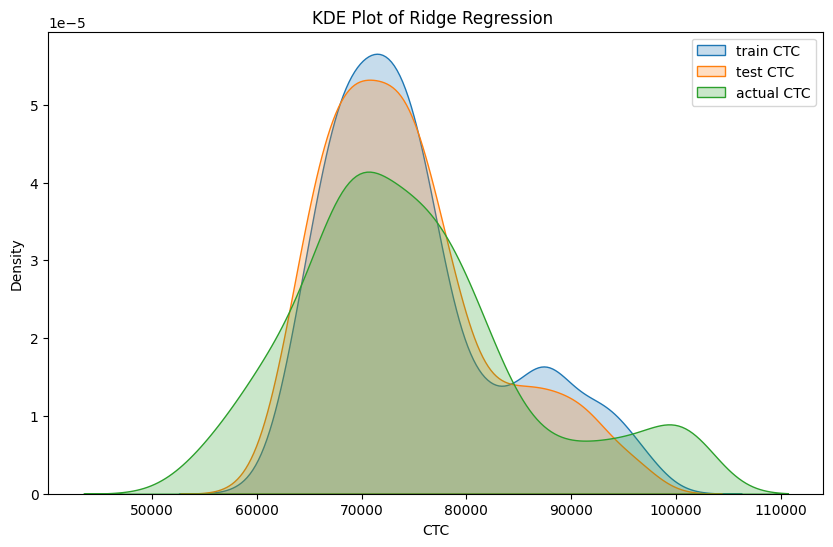

In [52]:
plt.figure(figsize=(10, 6))
sns.kdeplot(predict_train_r, label='train CTC', shade=True)
sns.kdeplot(predict_test_r, label='test CTC', shade=True)
sns.kdeplot(y_test, label='actual CTC', shade=True)
plt.title('KDE Plot of Ridge Regression ')
plt.xlabel('CTC')
plt.ylabel('Density')
plt.legend()
plt.show()

In [53]:
case_study.head(10)

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Previous_CTC_std,PCTC_minmax_scale
0,2,0,1,55523.0,3,66,19,71406.58,0.001826,0.494141
1,2,0,0,57081.0,1,84,18,68005.87,0.236820,0.535681
2,3,0,0,60347.0,2,52,28,76764.02,0.729432,0.622762
3,3,0,0,49010.0,2,81,33,82092.39,-0.980533,0.320486
4,1,0,0,57879.0,4,74,32,73878.10,0.357183,0.556958
5,2,0,0,54340.0,4,73,31,59950.89,-0.176606,0.462599
6,3,1,0,60298.0,1,42,46,66602.34,0.722042,0.621456
7,2,1,0,49944.0,2,56,37,57768.44,-0.839657,0.345389
8,3,1,0,53124.0,4,40,37,70083.30,-0.360016,0.430177
9,1,0,0,51141.0,1,47,60,85648.48,-0.659113,0.377305


# Your views about the problem statement?

TechWorks Consulting is planning to use a machine learning model to predict the salaries of new hires, ensuring fair and data-driven compensation. The task involves processing the data, such as converting educational background and city type into numerical values, and cleaning up any inaccuracies or outliers. The goal is to test different regression models, choose the most accurate one, and understand its strengths. This approach aims to bring consistency and objectivity to salary decisions, reflecting the company's commitment to leveraging technology for efficient business practices.

## What will be your approach to solving this task?

To tackle the task at TechWorks Consulting, I would start by preprocessing the data, which includes encoding categorical variables like 'College' and 'City', and managing outliers and feature scaling using techniques like IQR and StandardScaler. Next, I would experiment with various regression models such as Linear Regression, Lasso, Ridge, and Random Forest, utilizing GridSearchCV for hyperparameter tuning to optimize performance. The models would be evaluated based on metrics like R2 score, MAE, and MSE to ensure accuracy and generalizability. The best-performing model, likely the Gridsearch-tuned Random Forest based on initial results, would then be fine-tuned and used for salary predictions, ensuring that the model is robust and the predictions it offers are both accurate and reliable for the company's use.

## What were the available ML model options you had to perform this task?## What were the available ML model options you had to perform this task?

For the salary prediction task at TechWorks Consulting, the available machine learning models include Linear Regression, known for its simplicity and effectiveness in linear relationships; Lasso Regression, which is useful for feature selection through regularization; Ridge Regression, ideal for handling multicollinearity by shrinking correlated features; Random Forest Regressor, a robust ensemble method great for complex, non-linear patterns; and a combination of Random Forest with GridSearchCV for systematic hyperparameter tuning. The choice of the model largely depends on the data's characteristics, with a focus on evaluating each model's performance through metrics like R2 score, Mean Absolute Error (MAE), and Mean Squared Error (MSE) to ensure accurate and reliable predictions.

## Which model’s performance is best and what could be the possible reason for that?

# Explaination

## Linear Regression, Lasso, and Ridge Regression
#### showed similar performance. Their R2 scores on the test data were around 0.5, meaning they could explain about 50% of the variance in our target variable. The errors (MAE and MSE) were also quite similar. These models are decent, but they don't fit our data perfectly.

## Random Forest 
#### had a very high R2 score on the training data, almost 0.945, which means it fit the training data really well. But, its R2 score dropped to about 0.594 on the test data. This drop suggests it might be overfitting, which means it's learning the training data too well, including the noise, and thus not performing as well on new, unseen data.

## Gridsearch-tuned Random Forest
### gave us an interesting result. We used Gridsearch to find the best parameters for the Random Forest model. The best R2 score on the training data was around 0.677, and on the test data, it was around 0.573. The errors were lower compared to the basic Random Forest model. This means the tuned model is not just memorizing the training data but is also good at predicting new data.

## Considering the balance between how well the model fits the training data and how well it predicts new data, the 
# Gridsearch-tuned Random Forest 
## seems to be our best choice. It shows it can learn from the training data without overfitting and performs reasonably well on the test data, making it a reliable choice for our project.

In [54]:
case_study.head(10)

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Previous_CTC_std,PCTC_minmax_scale
0,2,0,1,55523.0,3,66,19,71406.58,0.001826,0.494141
1,2,0,0,57081.0,1,84,18,68005.87,0.236820,0.535681
2,3,0,0,60347.0,2,52,28,76764.02,0.729432,0.622762
3,3,0,0,49010.0,2,81,33,82092.39,-0.980533,0.320486
4,1,0,0,57879.0,4,74,32,73878.10,0.357183,0.556958
5,2,0,0,54340.0,4,73,31,59950.89,-0.176606,0.462599
6,3,1,0,60298.0,1,42,46,66602.34,0.722042,0.621456
7,2,1,0,49944.0,2,56,37,57768.44,-0.839657,0.345389
8,3,1,0,53124.0,4,40,37,70083.30,-0.360016,0.430177
9,1,0,0,51141.0,1,47,60,85648.48,-0.659113,0.377305


In [65]:
aa=[[1,1,0,20000.0,1,84,20,0.236820,0.535681]]

In [66]:
best_model.predict(aa)

array([65674.09347056])

## What steps can you take to improve this selected model’s performance even further?

To further enhance the performance of the Gridsearch-tuned Random Forest model, several steps can be taken: Improving feature engineering by creating new or transforming existing features; extending hyperparameter tuning with methods like RandomizedSearchCV; employing ensemble techniques such as stacking or boosting; addressing data imbalance with techniques like SMOTE; implementing a more robust cross-validation strategy like K-Fold; enhancing data quality by revisiting preprocessing steps; incorporating domain-specific knowledge into the feature set; experimenting with regularization methods to prevent overfitting; using model interpretation tools like SHAP to understand feature impacts; and adopting incremental learning for model updates with new data. These improvements should be iteratively evaluated to ensure they enhance performance without compromising the model's ability to generalize.